# 유동 인구 지도 함수

In [17]:
import os
import pandas as pd
from dbfread import DBF
from folium import plugins
import folium
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# !pip install folium

In [18]:
#아래에 유동인구가 있는 파일이 있는 경로 변경 필수
os.chdir(r'C:\Users\DOYEON\CONTEST\01. Big_contest\-DATA\01_유동인구데이터(SK텔레콤)')
path = os.getcwd()

# 유동인구 데이터
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith('.CSV')]
flow_age = file_list_csv[:8]

list_ = []

for files in flow_age:
    df = pd.read_csv(files,sep='|')
    list_.append(df)
flow_age = pd.concat(list_, ignore_index=True)

# 행정도DB 좌표 파일
dbf = DBF('4개지역_행정동(db파일).DBF')
dbf = pd.DataFrame(dbf)
dbf_ = dbf[['HDONG_CD','X_COORD','Y_COORD']]
dbf_['X_COORD'] = dbf_['X_COORD'].astype(float)
dbf_['Y_COORD'] = dbf_['Y_COORD'].astype(float)

dbf_['HDONG_CD'] = dbf_['HDONG_CD'].astype(str)
flow_age['HDONG_CD'] = flow_age['HDONG_CD'].astype(str)

col = flow_age.columns
male_col,female_col  = col[4:19],col[19:]

for idx, (a, b) in enumerate(zip(male_col, female_col)):
 flow_age[idx] = flow_age[a] + flow_age[b]

C:\Users\DOYEON\anaconda3\envs\mulcam_b\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DOYEON\anaconda3\envs\mulcam_b\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DOYEON\anaconda3\envs\mulcam_b\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [19]:
def float_pop_map(age,date1,date2, place):
    flow = flow_age[['STD_YM', 'HDONG_CD', 'HDONG_NM', age]]
    flow_mm = flow.groupby(['STD_YM','HDONG_CD']).sum().reset_index()
    flow_mm1 = flow_mm[flow_mm['STD_YM']== date1]
    flow_mm2 = flow_mm[flow_mm['STD_YM']== date2]
    
    flow_mm1, flow_mm2 = flow_mm1.merge(dbf_,on='HDONG_CD'),flow_mm2.merge(dbf_,on='HDONG_CD')

    m = folium.plugins.DualMap(
        location = place[0],
        zoom_start = 12
    )
    for i in flow_mm1.index:
        marker = folium.CircleMarker([flow_mm1['Y_COORD'].iloc[i],flow_mm1['X_COORD'].iloc[i]],
                                    radius = flow_mm1[age].iloc[i]/10000,
                                    color='#3186cc')
        marker.add_to(m.m1)

        marker = folium.CircleMarker([flow_mm2['Y_COORD'].iloc[i],flow_mm2['X_COORD'].iloc[i]],
                                    radius = flow_mm2[age].iloc[i]/10000,
                                    color='red')
        marker.add_to(m.m2)
    return m

In [20]:
age = 14#0부터 14까지 있고, 0-4, 5-9형태임
date1 = 201905 #월만 변경하기
date2 = 202005
place = [[37.6036, 127.0500]]
place_ = [[35.8417, 128.6322]]

In [30]:
# 서울
float_pop_map(age,date1,date2,place)

In [22]:
# 대구
float_pop_map(age,date1,date2,place_ )

## 나이대별 분포

In [23]:
col = flow_age.columns
male_col,female_col  = col[4:19],col[19:]

male_age_col,female_age_col = [], []
for i in range(8):
    male_age_col.append('male_age_{:02}'.format(i*10))
    female_age_col.append('female_age_{:02}'.format(i*10))
    
# 나이대별 합치기 ex.1014 + 1519 -> 10대
for idx, i in enumerate(range(0,15,2)):
    if idx == 7:
        flow_age[male_age_col[idx]] = flow_age[male_col[i]]
        flow_age[female_age_col[idx]] = flow_age[female_col[i]]
    else:
        flow_age[male_age_col[idx]] = flow_age[male_col[i]] + flow_age[male_col[i+1]]
        flow_age[female_age_col[idx]] = flow_age[female_col[i]] + flow_age[female_col[i+1]]

In [24]:
# 월별로 sum()
flow_age_mm = flow_age[['STD_YM','male_age_00', 'female_age_00', 'male_age_10',
       'female_age_10', 'male_age_20', 'female_age_20', 'male_age_30',
       'female_age_30', 'male_age_40', 'female_age_40', 'male_age_50',
       'female_age_50', 'male_age_60', 'female_age_60', 'male_age_70',
       'female_age_70']]
flow_age_mm_ = flow_age_mm.groupby('STD_YM').sum().reset_index()
month = ['Month_{:02}'.format(i) for i in range(2,6)]

In [25]:
flow_age.sort_values(by=['STD_YM'],axis=0)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,male_age_30,female_age_30,male_age_40,female_age_40,male_age_50,female_age_50,male_age_60,female_age_60,male_age_70,female_age_70
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,31245.34,24369.95,33587.86,19813.86,29247.15,15359.55,22033.62,9117.38,9882.67,4431.71
1295,201902,20190208,2726051000,범어1동,0.78,158.43,658.75,1585.73,2534.86,3237.35,...,8618.00,7167.60,11958.15,11043.83,11839.93,8823.03,7689.41,4975.61,3290.65,2345.68
1294,201902,20190207,2726051000,범어1동,0.00,170.65,581.35,1641.47,2605.29,3125.81,...,7957.58,6543.52,11299.27,10464.02,10973.63,8290.99,6820.18,4762.90,3139.06,2358.97
1293,201902,20190206,2726051000,범어1동,0.20,123.46,568.83,1309.42,2141.44,2698.89,...,5852.18,4689.21,7723.18,6595.99,7478.46,4932.70,4198.30,2440.02,1864.22,1166.25
1292,201902,20190205,2726051000,범어1동,0.00,156.72,759.92,1553.52,2379.78,3065.82,...,6717.16,5180.54,7982.34,6584.53,7735.49,5108.21,4210.62,2430.64,1500.10,1003.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15194,202005,20200523,1135061900,중계본동,0.00,152.78,1996.34,3534.23,1189.93,1212.85,...,1859.83,2205.46,5376.81,6204.38,4843.85,4145.42,2674.27,2167.78,1312.18,1254.86
15193,202005,20200522,1135061900,중계본동,0.00,137.36,1863.66,2665.61,1200.67,1118.56,...,1813.96,2106.13,4547.37,5894.03,4076.09,4228.77,2742.79,2143.93,1298.07,1344.58
15192,202005,20200521,1135061900,중계본동,0.00,145.99,1814.14,2691.30,1106.67,1081.16,...,1779.25,2085.06,4280.69,5799.71,4045.69,4160.61,2623.82,2160.77,1339.62,1325.34
15206,202005,20200504,1135062100,중계1동,0.00,123.02,1755.21,2622.21,987.47,1105.04,...,2067.15,1964.43,4942.62,5819.96,4249.17,3666.97,2629.39,1884.57,1152.95,951.53


In [26]:
dict_age = {'female':[],'male':[],'female_2019':[],'male_2019':[],'female_2020':[],'male_2020':[]}
for i in range(8):
    dict_age['female_2019'].append(round(flow_age['female_age_{:02}'.format(i*10)][:8280].sum()))
    dict_age['male_2019'].append(round(flow_age['male_age_{:02}'.format(i*10)][:8280].sum()))
    dict_age['female_2020'].append(round(flow_age['female_age_{:02}'.format(i*10)][8280:].sum()))
    dict_age['male_2020'].append(round(flow_age['male_age_{:02}'.format(i*10)][8280:].sum()))
    dict_age['female'].append(round(flow_age['female_age_{:02}'.format(i*10)].sum()))
    dict_age['male'].append(round(flow_age['male_age_{:02}'.format(i*10)].sum()))
    
age_dist = pd.DataFrame(dict_age)
age_dist.index = ['00대','10대','20대','30대','40대','50대','60대','70U']
age_dist.columns

Index(['female', 'male', 'female_2019', 'male_2019', 'female_2020',
       'male_2020'],
      dtype='object')

Text(0.5, 1.0, '2020년나이대별 유동인구 분포')

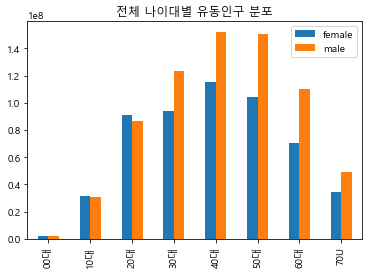

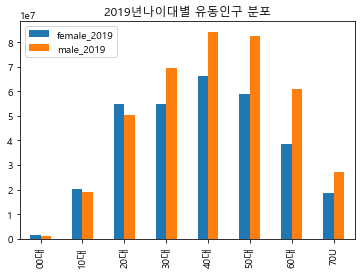

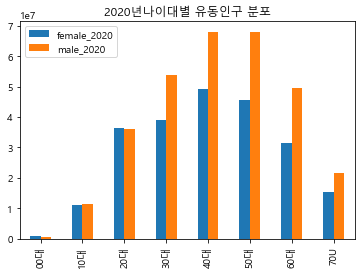

In [27]:
age_dist[['female', 'male']].plot(kind='bar')
plt.title('전체 나이대별 유동인구 분포')

age_dist[['female_2019', 'male_2019']].plot(kind='bar')
plt.title('2019년나이대별 유동인구 분포')

age_dist[['female_2020', 'male_2020']].plot(kind='bar')
plt.title('2020년나이대별 유동인구 분포')

## 나이대별 유동 추이

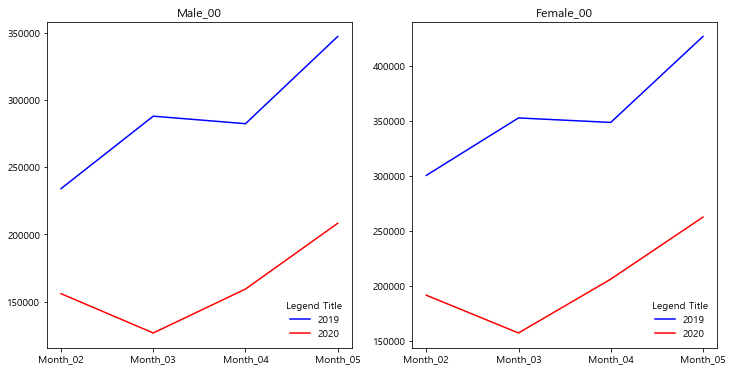

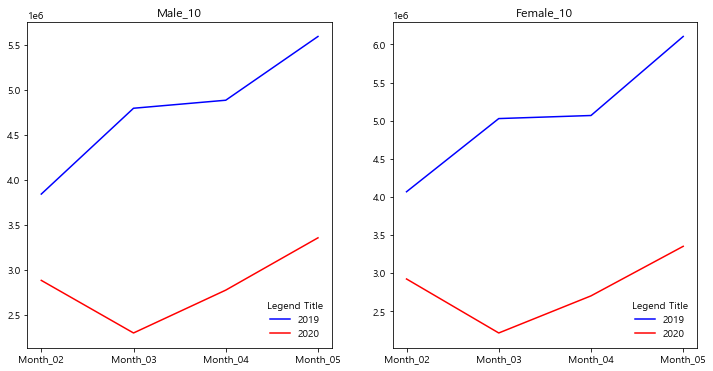

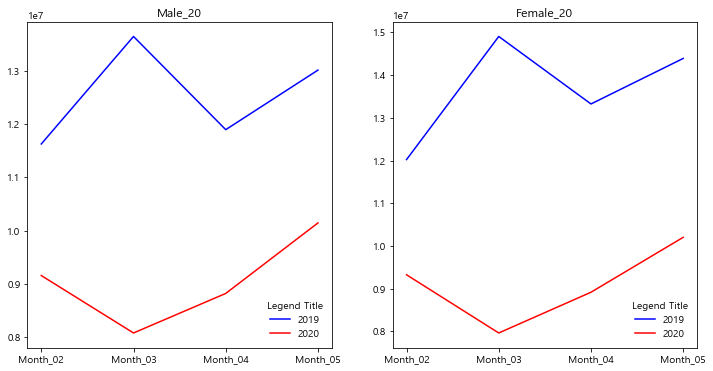

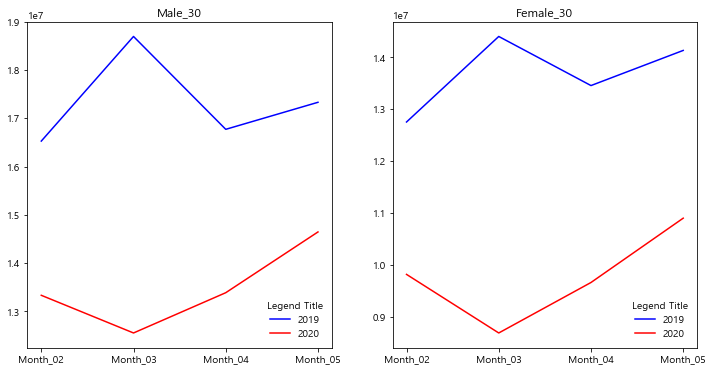

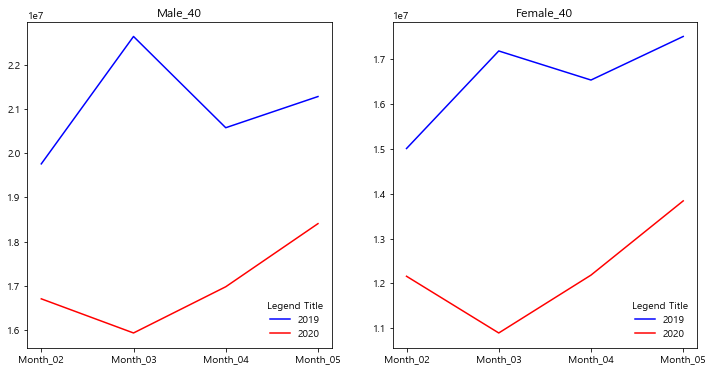

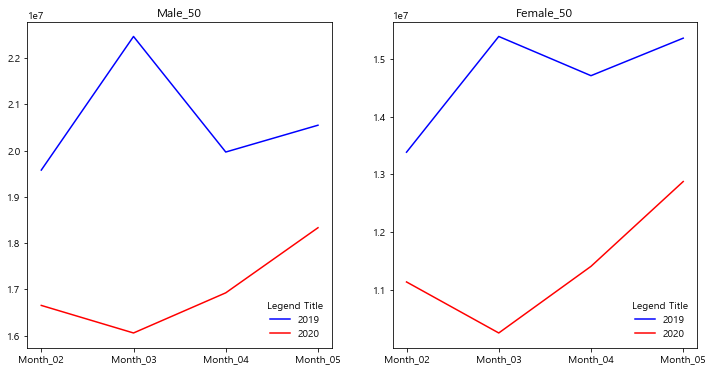

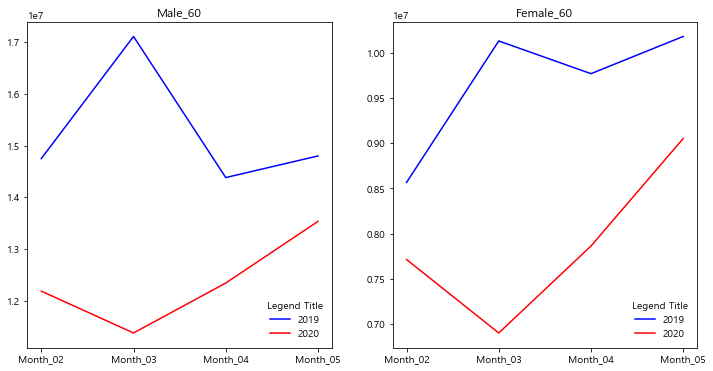

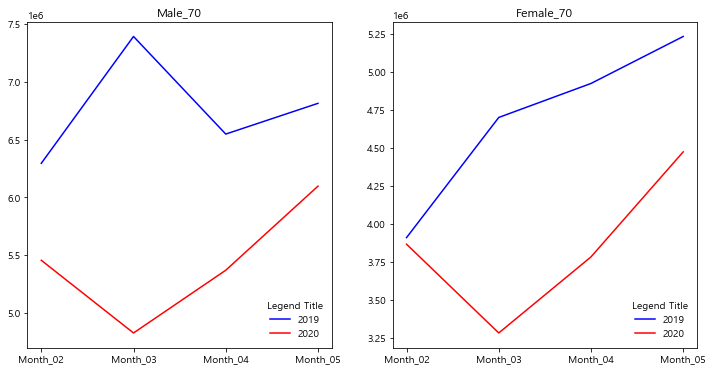

In [28]:
for i in range(8):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
    ax1.plot(month, flow_age_mm_['male_age_{:02}'.format(i*10)][:4], color="blue", label="2019")
    ax1.plot(month, flow_age_mm_['male_age_{:02}'.format(i*10)][4:], color="red", label="2020")
    ax1.legend(loc="lower right", title="Legend Title", frameon=False)
    ax1.set_title('Male_{:02}'.format(i*10))


    ax2.plot(month, flow_age_mm_['female_age_{:02}'.format(i*10)][:4], color="blue", label="2019")
    ax2.plot(month, flow_age_mm_['female_age_{:02}'.format(i*10)][4:], color="red", label="2020")
    ax2.legend(loc="lower right", title="Legend Title", frameon=False)
    ax2.set_title('Female_{:02}'.format(i*10))
    plt.show()

In [29]:
flow_age_mm_.columns

Index(['STD_YM', 'male_age_00', 'female_age_00', 'male_age_10',
       'female_age_10', 'male_age_20', 'female_age_20', 'male_age_30',
       'female_age_30', 'male_age_40', 'female_age_40', 'male_age_50',
       'female_age_50', 'male_age_60', 'female_age_60', 'male_age_70',
       'female_age_70'],
      dtype='object')